<h2><b>Import các thư viện

In [1]:
#import các thư viện cần dùng

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# bổ sung nếu cần 
from numpy import random

<h2><b>Khám phá dữ liệu </b></h2>

<b>Đầu tiên đọc file <b>games_info.csv</b> vào một Dataframe tên là `df_games_info`.</b>

In [2]:
#   YOUR CODE HEAR
df_games_info = pd.read_csv('../data/games_info.csv')
df_games_info.head(5)

,Title,Release date,Platform,Other platforms,Publisher,Developer,Genres,Rating,Number of players,Metascore,Number of critic reviews,User Score,Number of user reviews
0,The Legend of Zelda: Ocarina of Time,"Nov 23, 1998",Nintendo 64,NaN,Nintendo,Nintendo,"Action Adventure,Fantasy",E,1 Player,99.0,22,9.1,7359
1,Tony Hawk's Pro Skater 2,"Sep 20, 2000",PlayStation,"iPhone/iPad,PC",Activision,Neversoft Entertainment,"Sports,Alternative,Skateboarding",T,1-2,98.0,19,7.4,845
2,Grand Theft Auto IV,"Apr 29, 2008",PlayStation 3,"PC,Xbox 360",Rockstar Games,Rockstar North,"Action Adventure,Modern,Modern,Open-World",M,1 Player,98.0,64,7.8,4735
3,SoulCalibur,"Sep 8, 1999",Dreamcast,NaN,Namco,Namco,"Action,Fighting,3D",T,1-2,98.0,24,8.4,394
4,Grand Theft Auto IV,"Apr 29, 2008",Xbox 360,"PC,PlayStation 3",Rockstar Games,Rockstar North,"Action Adventure,Modern,Modern,Open-World",M,1 Player,98.0,86,8.0,3671


<b>Dữ liệu gồm bao nhiêu dòng và cột, lưu số dòng và số cột vào 2 biến `num_rows` và `num_cols`.</b>

In [3]:
#   YOUR CODE HEAR
num_rows = df_games_info.shape[0]
num_cols = df_games_info.shape[1]
print(num_cols)
print(num_rows)

13
1498


<b>Các dòng của dữ liệu có bị lặp không, lưu vào biến `have_duplicated_rows` là `False` nếu không lặp và ngược lại.</b>

In [4]:
#   YOUR CODE HEAR
have_duplicated_rows = False
if df_games_info[df_games_info.duplicated()].empty == True:
    have_duplicated_rows == True
print(have_duplicated_rows)

False


<b>Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?</b>

Lưu giá trị của các kiểu dữ liệu vào biến `col_dtypes`.

In [5]:
#   YOUR CODE HEAR
df_games_info.dtypes
col_dtypes = df_games_info.dtypes
print(col_dtypes)

Title                        object
Release date                 object
Platform                     object
Other platforms              object
Publisher                    object
Developer                    object
Genres                       object
Rating                       object
Number of players            object
Metascore                   float64
Number of critic reviews      int64
User Score                  float64
Number of user reviews        int64
dtype: object


<b>Ý nghĩa của các dòng và các cột</b> 

<b>Tìm kiếm kiểu dữ liệu thật sự của các cột có dtype là object.</b>

In [6]:
# YOUR CODE HERE
def open_object_dtype(s):
    dtypes = set()
    s.apply(lambda x : dtypes.add(type(x)))
    return dtypes

print(open_object_dtype(df_games_info['Number of players']))

{<class 'str'>, <class 'float'>}


<b>Các vấn đề cần tiền xử lí</b>
- Cột Release date đang có kiểu dữ liệu là `str`, việc cần làm là đổi nó sang kiểu `datetime`.
- Cột Rating để biểu diễn lứa tuổi phù hợp đang có 2 kiểu dữ liệu là `str` và `float`, việc cần làm là đổi cột này sang dạng `int`.
- Cột Number of players đang có 2 kiểu dữ liệu là `str` và `float`, việc cần làm là đổi cột này sang dạng `int` vì số lượng người chơi phải là số nguyên dương (Ở biến này có những chuỗi phức tạp nên ta sẽ tìm hiểu sau hơn ở phần tiền xử lí bên dưới).

<h2><b>Tiền xử lí dữ liệu</b><h2>

<b>Chuyển cột Release date sang kiểu dữ liệu datetime.

In [7]:
# YOUR CODE HEAR
df_games_info['Release date'] = pd.to_datetime(df_games_info['Release date'],format="%b %d, %Y")
print(df_games_info['Release date'].dt.year)

0       1998
1       2000
2       2008
3       1999
4       2008
        ... 
1493    2010
1494    2004
1495    2011
1496    2003
1497    2003
Name: Release date, Length: 1498, dtype: int64


<b>Chuyển cột Rating sang kiểu dữ liệu int. Ta quy định như sau:</b>

Trong cột này có các giá trị ['E' 'T' 'M' 'E10+' nan 'K-A' 'AO']

- E là 3 tuổi trở lên nên quy định trong tệp này là 3

- T là 13 tuổi trở lên nên quy định trong tệp này là 13

- M là từ 17 tuổi trở lên nên quy định trong tệp này là 17

- E10+ là từ từ 10 tuổi trở lên nên quy định trong tệp này là 10

- K-A là từ 6 tuổi nên ta quy trong tệp này là 6

- AO là từ 18 nên quy định trong tệp này là 18

- Với nan ta quy định là -1



In [8]:
# YOUR CODE HEAR
def replace_rating(df,val_old,val_new):
    return df.replace([val_old], val_new)

df_games_info['Rating'] = replace_rating(df_games_info['Rating'],'E',3)
df_games_info['Rating'] = replace_rating(df_games_info['Rating'],'T',13)
df_games_info['Rating'] = replace_rating(df_games_info['Rating'],'M',17)
df_games_info['Rating'] = replace_rating(df_games_info['Rating'],'E10+',10)
df_games_info['Rating'] = replace_rating(df_games_info['Rating'],'K-A',6)
df_games_info['Rating'] = replace_rating(df_games_info['Rating'],'AO',18)
df_games_info['Rating'] = replace_rating(df_games_info['Rating'],np.nan,-1)

df_games_info = df_games_info.astype({'Rating':'int'})
print(df_games_info['Rating'])

0        3
1       13
2       17
3       13
4       17
        ..
1493     3
1494    13
1495    17
1496     3
1497     3
Name: Rating, Length: 1498, dtype: int32


<b>Ở đây ta tập trung tiền xử lí cho cột Number of players.</b>
- Đầu tiên hãy kiểm tra xem cột này có bao nhiêu giá trị khác nhau.
- Sau đó ta sẽ quy định lại giá trị int tương ứng cho giá trị đó.

Chúng ta sẽ kiểm tra số lượng giá trị khác nhau và lưu vào một list là `unique_values`.

In [9]:
# YOUR CODE HEAR
unique_values = df_games_info['Number of players'].unique()
print(unique_values)

['1 Player' '1-2' 'No Online Multiplayer' 'Up to 32' 'Up to 30' 'Up to 16'
 nan '1-4' 'Up to 4' 'Online Multiplayer' 'Up to 6' '1-16' 'Up to 8' '2'
 'Up to 18' '1-8' '8  Online' '2  Online' '4  Online' '1-32' 'Up to 10'
 'Up to 40' '16  Online' 'Massively Multiplayer' 'Up to 12' '24  Online'
 '6  Online' '1-12' 'Up to 20' 'Up to 5' '64+' 'Up to 22' 'Up to 60' '1-6'
 'Up to 24' 'Up to 3' '1-10' '64  Online' 'Up to 64' '12  Online'
 '10  Online' '32  Online']


- Với các giá trị có dạng `1-2, 1-16,...` ta chuyển nó thành giá trị của số lớn nhất bên phải.
- Với các giá trị có dạng `Up to 32` ta chuyển nó thành 32.
- Với các giá trị có dạng `No Online Multiplayer` ta chuyển nó thành 2.
- Với các giá trị có dạng `Massively Multiplayer` ta chuyển nó thành giá trị đoạn [1000,inf]
- Với các giá trị có dạng `Online Multiplayer` ta chuyển nó thành giá trị đoạn [2,100]
- Với các giá trị có dạng `Online` ta chuyển nó thành giá trị đoạn [2,50]
- Với các giá trị có dạng `64+` ta chuyển nó thành một giá trị đoạn [64,200]
- Với các giá trị có dạng `1 Player` ta chuyển nó thành 1
- Với giá trị `nan` ta cho bằng np.nan


In [10]:

def replace_num_of_player(value):
    if str(value).find('-') != -1:
        return int(value[value.find('-') + 1])
    elif str(value).find('Up to ') != -1:
        return int(value[6:8])
    elif str(value).find('  Online') != -1:
        return int(value[0: len(value) - 7])
    elif value =='No Online Multiplayer':
        return 1
    elif value == 'Massively Multiplayer':
        return [1000,np.inf]
    elif value == 'Online Multiplayer':
        return [2,100]
    elif value == 'Online':
        return [2,50]
    elif value == '64+':
        return [64,200]
    elif value == '1 Player':
        return 1
    else:
        return value
    

for i in range(len(df_games_info['Number of players'])):
    df_games_info['Number of players'].at[i] = replace_num_of_player(df_games_info['Number of players'].at[i])
df_games_info['Number of players'] = df_games_info['Number of players'].replace([np.nan],'0')
print(df_games_info['Number of players'])

0       1
1       2
2       1
3       2
4       1
       ..
1493    0
1494    1
1495    2
1496    4
1497    2
Name: Number of players, Length: 1498, dtype: object


Sau khi đã xong chúng ta tiếp tục các bước khám phá dữ liệu.

<h2><b>Khám phá dữ liệu (Tiếp tục).</b></h2>

<b>Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?</b>

Các cột dạng numeric là: Metascore, Number of critic reviews, User Score, Number of user reviews.

Với mỗi cột numeric bạn sẽ tính tỉ lệ % giá trị thiếu (từ 0 đến 100), min, max. Bạn lưu kết quả vào dataframe `nume_col_profiles_df`. Dataframe này có 3 dòng là "missing_ratio", "min", "max"; và có 5 cột là "Metascore", "Number of critic reviews", "User Score", "Number of user reviews".

In [11]:
# YOUR CODE HEAR
# YOUR CODE HERE
nume_col_profiles_df = pd.DataFrame(
    index=pd.Index(['missing_ratio', 'min','max']),
)
def col_profile(df):
    missing_ratio = (df.isnull().sum() / df.shape[0]) * 100
    min = df.min()
    max = df.max()
    result = [missing_ratio,min,max]
    return result

    
nume_col_profiles_df['Metascore'] = col_profile(df_games_info['Metascore'])
nume_col_profiles_df['Number of critic reviews'] = col_profile(df_games_info['Number of critic reviews'])
nume_col_profiles_df['User Score'] = col_profile(df_games_info['User Score'])
nume_col_profiles_df['Number of user reviews'] = col_profile(df_games_info['Number of user reviews'])


print(nume_col_profiles_df)

               Metascore  Number of critic reviews  User Score  \
missing_ratio        0.0                       0.0         0.0   
min                 86.0                       7.0         2.1   
max                 99.0                     132.0         9.6   

               Number of user reviews  
missing_ratio                     0.0  
min                               4.0  
max                          159969.0  


<b>Với mỗi cột có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào?</b>

Với mỗi cột dạng categorical, bạn tính tỉ lệ % giá trị thiếu (từ 0 đến 100), số lượng giá trị khác nhau (không xét giá trị thiếu), list/array các giá trị khác nhau (không xét giá trị thiếu). Bạn lưu kết quả vào dataframe `cate_col_profiles_df`. Dataframe này có 3 dòng là "missing_ratio", "num_diff_vals", "diff_vals"; và có 7 cột là "Title", "Release date", "Platform", "Other platforms", "Publisher", "Developer", "Genres"

In [12]:
# YOUR CODE HERE
cate_col_profiles_df = pd.DataFrame(
    index = pd.Index(['missing_ratio','num_diff_vals','diff_vals'])
)
def cate_col_profile(df):
    missing_ratio = (df.isnull().sum() / df.shape[0]) * 100
    num_diff_vals = df.nunique()
    temp = df
    temp = temp.dropna()
    diff_vals = set(temp)
    result = [missing_ratio,num_diff_vals,diff_vals]
    return result
cate_col_profiles_df['Title'] = cate_col_profile(df_games_info['Title'])
cate_col_profiles_df['Release date'] = cate_col_profile(df_games_info['Release date'])
cate_col_profiles_df['Platform'] = cate_col_profile(df_games_info['Platform'])
cate_col_profiles_df['Other platforms'] = cate_col_profile(df_games_info['Other platforms'])
cate_col_profiles_df['Publisher'] = cate_col_profile(df_games_info['Publisher'])
cate_col_profiles_df['Developer'] = cate_col_profile(df_games_info['Developer'])
cate_col_profiles_df['Genres'] = cate_col_profile(df_games_info['Genres'])

print(cate_col_profiles_df)

                                                           Title  \
missing_ratio                                                0.0   
num_diff_vals                                               1042   
diff_vals      {Tom Clancy's Splinter Cell Double Agent, Warh...   

                                                    Release date  \
missing_ratio                                                0.0   
num_diff_vals                                               1019   
diff_vals      {2003-05-01 00:00:00, 2002-03-24 00:00:00, 200...   

                                                        Platform  \
missing_ratio                                                0.0   
num_diff_vals                                                 21   
diff_vals      {PlayStation 5, Xbox 360, Xbox One, PlayStatio...   

                                                 Other platforms  \
missing_ratio                                          32.042724   
num_diff_vals                                

<b> Top 20 tựa game được yêu thích nhất trên nền tảng PC là gì? </b>

In [13]:
df_pc_games_score = df_games_info[df_games_info['Platform'] == 'PC']
df_pc_games_score = df_pc_games_score[['Title', 'Metascore', 'User Score']]

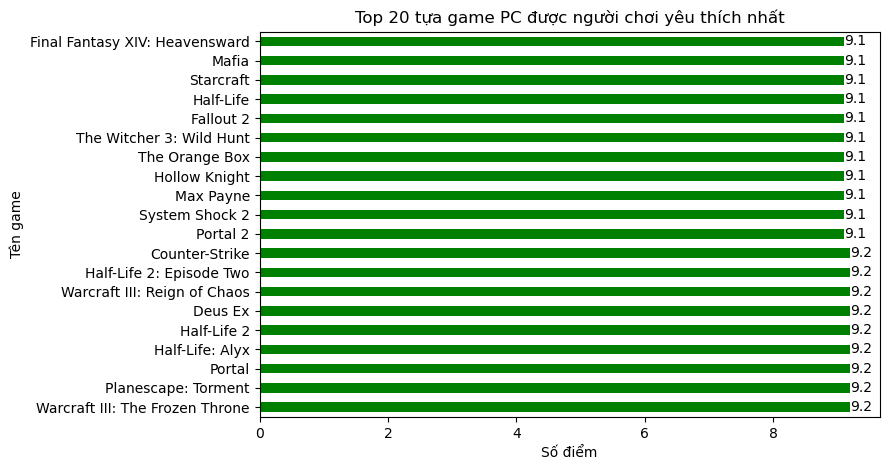

In [14]:
df_pc_user_score = df_pc_games_score[['Title', 'User Score']].sort_values(by='User Score', ascending=False)
fig = df_pc_user_score.head(20).plot(kind='barh', 
                                     figsize=(8,5),
                                     x='Title',
                                     y='User Score',
                                     title='Top 20 tựa game PC được người chơi yêu thích nhất', 
                                     xlabel='Tên game', 
                                     ylabel='Số điểm', 
                                     color='green',
                                     rot=0, 
                                     legend=False)
fig.set_xlabel('Số điểm')
fig.bar_label(fig.containers[0], label_type='edge')
plt.show()

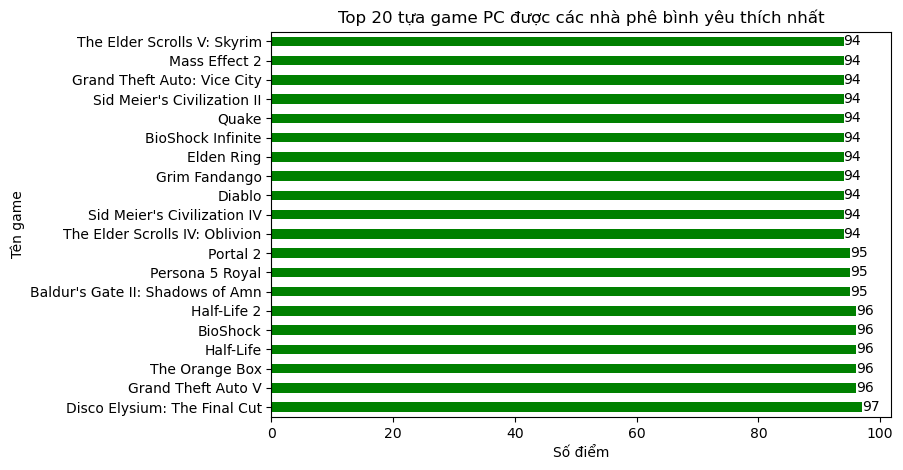

In [15]:
df_pc_critic_score = df_pc_games_score[['Title', 'Metascore']].sort_values(by='Metascore', ascending=False)
fig = df_pc_critic_score.head(20).plot(kind='barh', 
                                     figsize=(8,5),
                                     x='Title',
                                     y='Metascore',
                                     title='Top 20 tựa game PC được các nhà phê bình yêu thích nhất', 
                                     xlabel='Tên game', 
                                     ylabel='Số điểm', 
                                     color='green',
                                     rot=0, 
                                     legend=False)
fig.set_xlabel('Số điểm')
fig.bar_label(fig.containers[0], label_type='edge')
plt.show()

<b> Số lượng game singleplayer được phát hành qua từng năm </b>

In [16]:
df_single_games = df_games_info[df_games_info['Number of players'] == 1]
df_single_games = df_single_games[['Title', 'Release date', 'Metascore', 'User Score']]

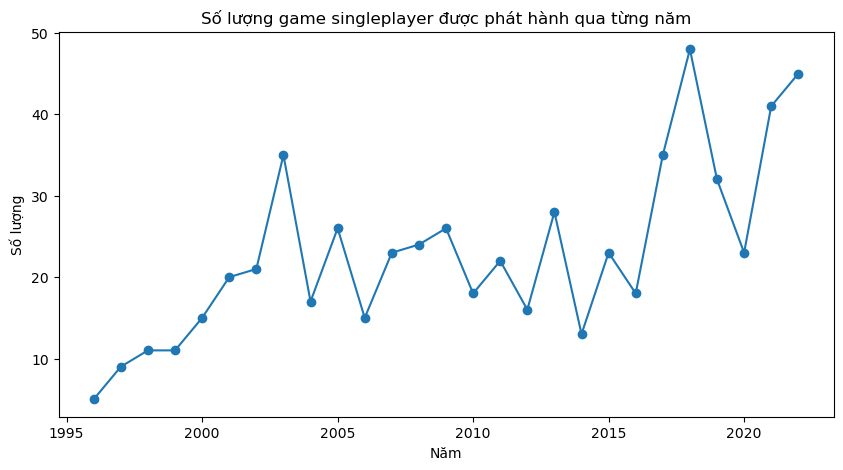

In [17]:
df_single_release_info = df_single_games['Release date'].dt.year
df_single_release_info_count = df_single_release_info.value_counts().sort_index().to_frame(name='count')
fig = df_single_release_info_count.plot(kind='line', 
                                        marker='o', 
                                        figsize=(10,5), 
                                        title='Số lượng game singleplayer được phát hành qua từng năm',  
                                        xlabel='Năm',  
                                        ylabel='Số lượng', 
                                        legend=False)
plt.show()

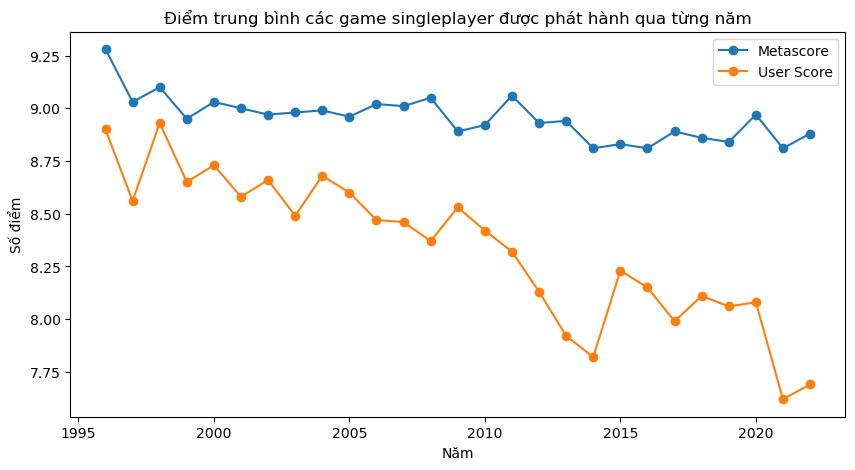

In [49]:
dict_year_metascr_userscr = {
                             'Metascore': [0] * len(np.unique(df_single_release_info)),
                             'User Score': [0] * len(np.unique(df_single_release_info))
                            }
df_single_score = pd.DataFrame(dict_year_metascr_userscr, index= np.unique(df_single_release_info))
for year in np.unique(df_single_release_info):
    metascore = round(((df_single_games.loc[df_single_games['Release date'].dt.year == year, 'Metascore'].mean()) / 10.0), 2)
    user_score = round((df_single_games.loc[df_single_games['Release date'].dt.year == year, 'User Score'].mean()), 2)
    df_single_score.loc[year, 'Metascore'] = metascore
    df_single_score.loc[year, 'User Score'] = user_score
fig = df_single_score.plot(kind='line', 
                           marker='o', 
                           figsize=(10,5), 
                           title='Điểm trung bình các game singleplayer được phát hành qua từng năm',  
                           xlabel='Năm',  
                           ylabel='Số điểm')
plt.show()

<b> Số lượng game 3D được phát hành qua từng năm </b>

In [18]:
df_genres_info = df_games_info['Genres'].apply(lambda x: x.split(',')) #splitting genres values into list
df_genres_explode_info = df_genres_info.explode()
idx_3d_genre = np.unique(df_genres_explode_info[df_genres_explode_info == '3D'].index) #get indexes of games in the 3D genres
df_3d_genre_info = df_games_info.iloc[idx_3d_genre]

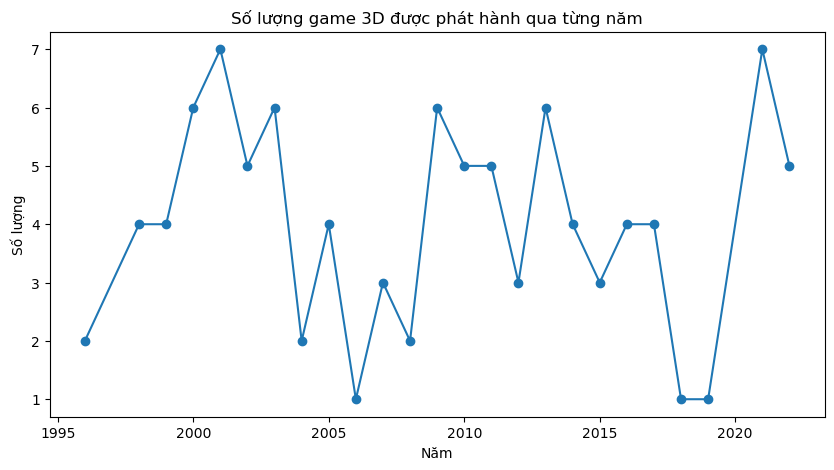

In [26]:
df_3d_release_info = df_3d_genre_info['Release date'].dt.year
df_3d_release_info_count = df_3d_release_info.value_counts().sort_index().to_frame(name='count')
fig = df_3d_release_info_count.plot(kind='line', 
                                    marker='o', 
                                    figsize=(10,5), 
                                    title='Số lượng game 3D được phát hành qua từng năm',  
                                    xlabel='Năm',  
                                    ylabel='Số lượng', 
                                    legend=False)
plt.show()